In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:32<00:00, 32.5MB/s]
100% 812M/812M [00:32<00:00, 26.4MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted successfully')

The dataset is extracted successfully


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.6044.jpg', 'dog.6786.jpg', 'cat.11106.jpg', 'cat.11855.jpg', 'cat.1929.jpg', 'dog.5236.jpg', 'dog.7356.jpg', 'cat.6600.jpg', 'cat.1059.jpg', 'dog.5949.jpg', 'dog.2239.jpg', 'cat.2071.jpg', 'dog.5648.jpg', 'dog.2769.jpg', 'dog.2179.jpg', 'dog.4119.jpg', 'dog.8157.jpg', 'cat.639.jpg', 'cat.10171.jpg', 'cat.9959.jpg', 'dog.5824.jpg', 'cat.11027.jpg', 'dog.10736.jpg', 'dog.9081.jpg', 'dog.3212.jpg', 'dog.11829.jpg', 'dog.10241.jpg', 'dog.8568.jpg', 'dog.9597.jpg', 'cat.4821.jpg', 'cat.2232.jpg', 'dog.3074.jpg', 'cat.6190.jpg', 'dog.1727.jpg', 'cat.6074.jpg', 'cat.5846.jpg', 'dog.12324.jpg', 'dog.1778.jpg', 'cat.8702.jpg', 'cat.2741.jpg', 'dog.8790.jpg', 'cat.2984.jpg', 'dog.11254.jpg', 'cat.1628.jpg', 'cat.9716.jpg', 'dog.1133.jpg', 'dog.3324.jpg', 'dog.6011.jpg', 'dog.6247.jpg', 'dog.10977.jpg', 'cat.1893.jpg', 'dog.4790.jpg', 'cat.1444.jpg', 'dog.10566.jpg', 'cat.4647.jpg', 'dog.1927.jpg', 'dog.6086.jpg', 'cat.6559.jpg', 'cat.9293.jpg', 'cat.9925.jpg', 'dog.8798.jpg', 'dog.7011.jpg

Importing the Dependencies


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

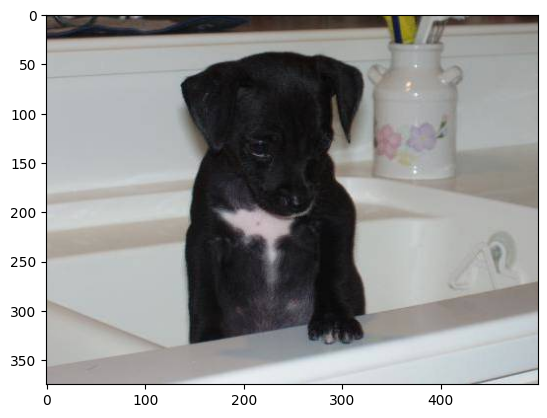

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

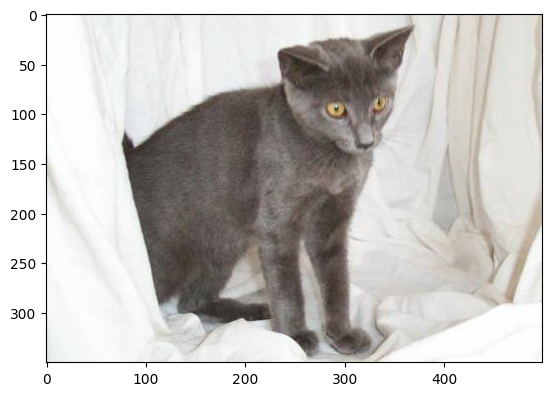

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4337.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
dog
cat
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

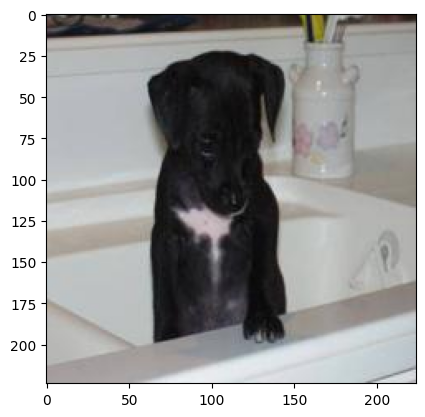

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

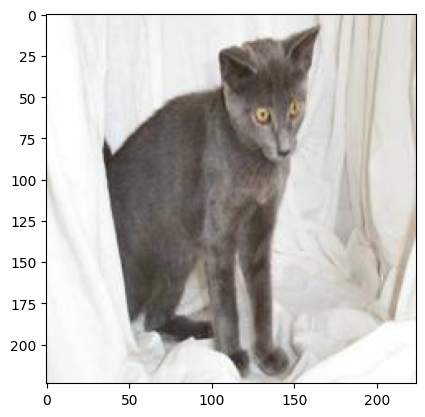

In [ ]:
# display resized cat image
img = mpimg.imread ('/content/image resized/cat.4337.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.6044.jpg', 'dog.6786.jpg', 'cat.11106.jpg', 'cat.11855.jpg', 'cat.1929.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 76  70  75]
   [ 48  42  47]
   [ 42  39  41]
   ...
   [138 143 141]
   [110 116 111]
   [ 97 103  98]]

  [[ 70  64  69]
   [ 52  46  51]
   [ 50  47  49]
   ...
   [128 133 131]
   [114 120 115]
   [113 119 114]]

  [[ 66  60  65]
   [ 58  52  57]
   [ 60  57  59]
   ...
   [122 125 123]
   [128 131 129]
   [139 142 140]]

  ...

  [[ 63  55  55]
   [ 64  56  56]
   [ 68  61  58]
   ...
   [ 74  66  53]
   [ 66  58  45]
   [ 70  62  49]]

  [[ 60  52  52]
   [ 61  53  53]
   [ 68  61  58]
   ...
   [ 57  49  36]
   [ 82  74  61]
   [124 116 103]]

  [[ 64  56  56]
   [ 63  55  55]
   [ 66  59  56]
   ...
   [ 85  77  64]
   [121 113 100]
   [155 147 134]]]


 [[[132  95  69]
   [136  99  73]
   [143 106  80]
   ...
   [ 46  54  71]
   [ 46  53  70]
   [ 46  53  70]]

  [[135  99  75]
   [136 101  75]
   [138 102  78]
   ...
   [ 46  54  71]
   [ 46  53  70]
   [ 46  53  70]]

  [[136 102  79]
   [135 101  77]
   [134 100  77]
   ...
   [ 45  52  71]
   [ 46  52  71]
   [ 46  52

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.68627451 0.72156863 0.87058824]
   [0.65882353 0.69411765 0.84313725]
   [0.60392157 0.63921569 0.78823529]
   ...
   [0.57647059 0.69411765 0.7372549 ]
   [0.58039216 0.69803922 0.74117647]
   [0.58039216 0.69803922 0.74117647]]

  [[0.64313725 0.67843137 0.82745098]
   [0.60392157 0.63921569 0.78823529]
   [0.56078431 0.59607843 0.74509804]
   ...
   [0.59215686 0.70980392 0.75294118]
   [0.59215686 0.70980392 0.75294118]
   [0.59607843 0.71372549 0.75686275]]

  [[0.59607843 0.63137255 0.78039216]
   [0.57254902 0.60784314 0.75686275]
   [0.54509804 0.58039216 0.72941176]
   ...
   [0.6        0.71764706 0.76078431]
   [0.6        0.71764706 0.76078431]
   [0.6        0.71764706 0.76078431]]

  ...

  [[0.23529412 0.16078431 0.12941176]
   [0.24313725 0.16862745 0.1372549 ]
   [0.24705882 0.17254902 0.14117647]
   ...
   [0.45098039 0.55686275 0.57254902]
   [0.46666667 0.58039216 0.59607843]
   [0.48627451 0.60784314 0.61960784]]

  [[0.24705882 0.17254902 0.14117647]
   [0.2

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 77s 1s/step - loss: 0.1693 - acc: 0.9344
Epoch 2/5
50/50 [==============================] - 66s 1s/step - loss: 0.0679 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 70s 1s/step - loss: 0.0514 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0410 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 76s 2s/step - loss: 0.0340 - acc: 0.9906


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.1067 - acc: 0.9650
Test Loss = 0.10671394318342209
Test Accuracy = 0.9649999737739563


Predictive System

Path of the image to be predicted: /content/image resized/cat.10061.jpg


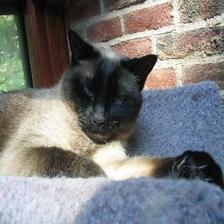

1/1 [==============================] - 1s 606ms/step
[[ 2.4227407 -2.5215437]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/image resized/dog.10094.jpg


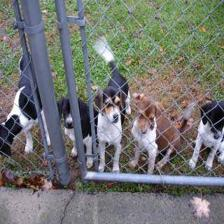

1/1 [==============================] - 0s 52ms/step
[[-3.0304697  2.6972792]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')